In [1]:
library(tidyverse)
library(RColorBrewer)
library(DESeq2)
library(pheatmap)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The follow

In [2]:
setwd('/ufrc/soltis/shan158538/TragFL_NewAnalysis/OutPut/DE_analysis/12_possible_differential_exp_states/Tms')

In [3]:
## Loading data
data <- read.table("DESeq2_count_matrix_Tms_additive.csv", sep=",",header = T,row.names=1)
meta <- read.csv("DESeq2_Tms_additive_sample_annotation.tsv", sep = "\t", row.names="sample")
## first column is row names: row.names = 1

In [4]:
head(data)

,Tdu_1,Tdu_2,Tdu_3,Tdu_4,Tdu_5,Tdu_6,Tpr_1,Tpr_2,Tpr_3,Tms_1,Tms_2,Tms_3
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Tpr_TRINITY_DN11257_c2_g1|Tdu_TRINITY_DN16696_c0_g1,92,109,123,106,116,121,103,173,78,63,65,63
Tpr_TRINITY_DN10844_c2_g7|Tdu_TRINITY_DN25328_c2_g5,157,218,281,177,169,238,204,402,205,130,154,195
Tpr_TRINITY_DN15383_c4_g16|Tdu_TRINITY_DN14160_c0_g1,36,64,58,43,36,47,21,25,18,11,30,21
Tpr_TRINITY_DN1451_c0_g1|Tdu_TRINITY_DN16990_c3_g1,96,140,142,80,126,108,141,200,119,32,43,76
Tpr_TRINITY_DN10853_c1_g4|Tdu_TRINITY_DN21860_c3_g3,773,1099,976,809,1113,918,751,1281,700,362,405,497
Tpr_TRINITY_DN12798_c2_g2|Tdu_TRINITY_DN24179_c2_g3,50,46,72,28,48,39,35,118,55,84,40,93


## Normalization and quality control

In [5]:
## match the metadata and counts data
all(colnames(data) %in% rownames(meta))

[1] TRUE

In [6]:
## Creat DESeq2Dataset object
dds <- DESeqDataSetFromMatrix(countData = data, colData = meta, design = ~ species)
## generate size factors
## By assigning the results back to the dds object we are filling in the slots of the DESeqDataSet object with the appropriate info
dds <- estimateSizeFactors(dds)

In [7]:
head(counts(dds, normalized=TRUE))

,Tdu_1,Tdu_2,Tdu_3,Tdu_4,Tdu_5,Tdu_6,Tpr_1,Tpr_2,Tpr_3,Tms_1,Tms_2,Tms_3
Tpr_TRINITY_DN11257_c2_g1|Tdu_TRINITY_DN16696_c0_g1,84.07973,80.98018,78.71818,109.56317,89.42044,113.16219,119.95424,108.07666,97.93217,94.98812,108.34178,67.07172
Tpr_TRINITY_DN10844_c2_g7|Tdu_TRINITY_DN25328_c2_g5,143.48388,161.96036,179.83584,182.94982,130.27633,222.58349,237.57928,251.13768,257.38584,196.00722,256.68669,207.60293
Tpr_TRINITY_DN15383_c4_g16|Tdu_TRINITY_DN14160_c0_g1,32.90076,47.54800,37.11914,44.44544,27.75117,43.95556,24.45669,15.61801,22.59973,16.58523,50.00390,22.35724
Tpr_TRINITY_DN1451_c0_g1|Tdu_TRINITY_DN16990_c3_g1,87.73537,104.01124,90.87790,82.68918,97.12910,101.00427,164.20921,124.94412,149.40934,48.24793,71.67226,80.91191
Tpr_TRINITY_DN10853_c1_g4|Tdu_TRINITY_DN21860_c3_g3,706.45248,816.48824,624.62556,836.19438,857.97371,858.53630,874.61784,800.26708,878.87847,545.80473,675.05265,529.12131
Tpr_TRINITY_DN12798_c2_g2|Tdu_TRINITY_DN24179_c2_g3,45.69550,34.17512,46.07893,28.94121,37.00156,36.47376,40.76115,73.71703,69.05474,126.65082,66.67187,99.01063


In [8]:
## write out the matrix of normalized reads count
Normalized_reads_counts = counts(dds, normalized=TRUE)
write.table(Normalized_reads_counts, file="normalized_counts.txt", sep="\t", quote=F, col.names=NA)

In [9]:
## Transform normalized counts using the rlog transformation
## The rlog transformation of the normalized counts is only necessary for these visualization methods during this quality assessment
## The blind=TRUE argument results in a transformation unbiased to sample condition information
rld <- rlog(dds, blind=TRUE)

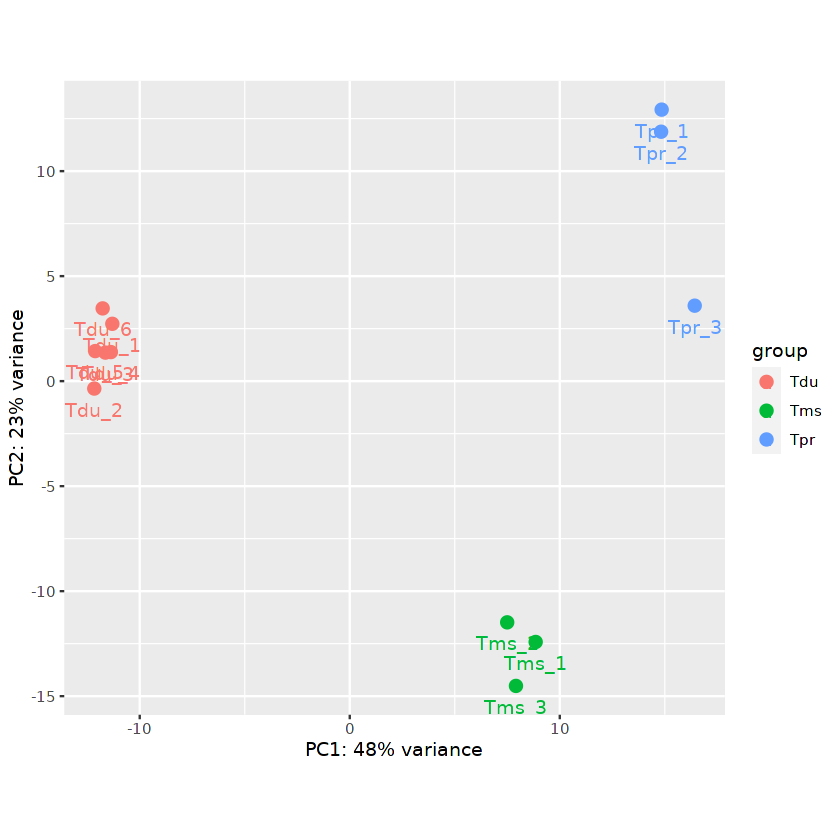

In [10]:
## Plot PCA
plotPCA(rld, intgroup="species") + geom_text(aes(label=name),vjust=2)

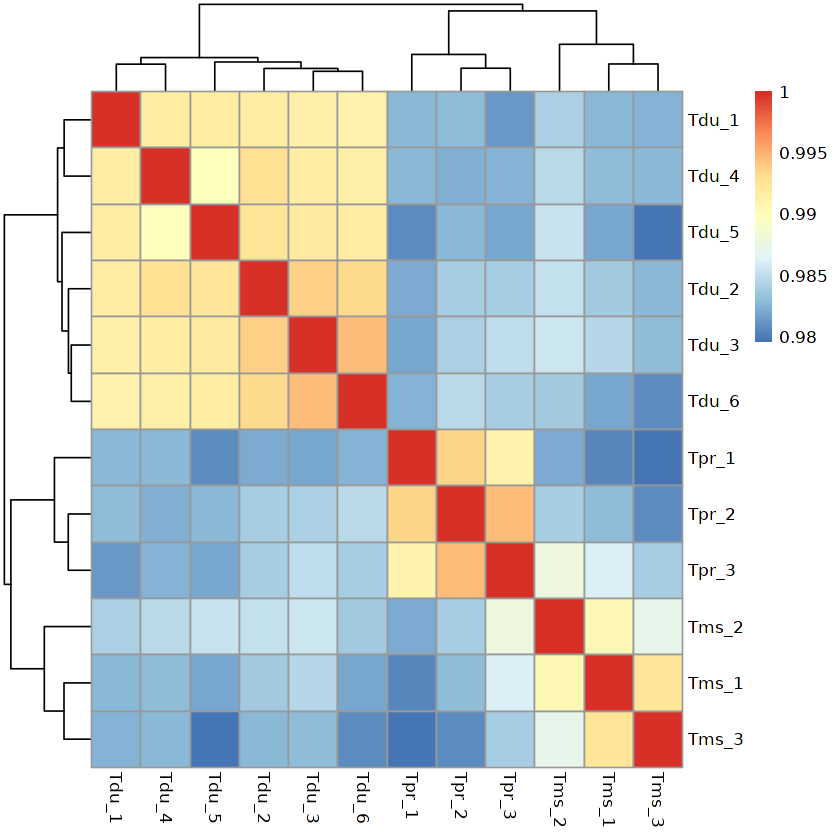

In [11]:
## Hierarchical clustering
## Extract the rlog matrix from the object
rld_mat <- assay(rld)
## Compute pairwise correlation values
rld_cor <- cor(rld_mat)
## Plot heatmap
pheatmap(rld_cor)

### Based on quality control analysis, samples from the same species are clustered together

In [12]:
## log2 fold change shrinkage will NOT be performed
## But this will generate the proper resultsNames(dds) results, which will be used for comparing MPV to polyploid
## No shrinkage won't affect the number of DE genes identified

dds <- DESeq(dds, betaPrior = TRUE)

using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



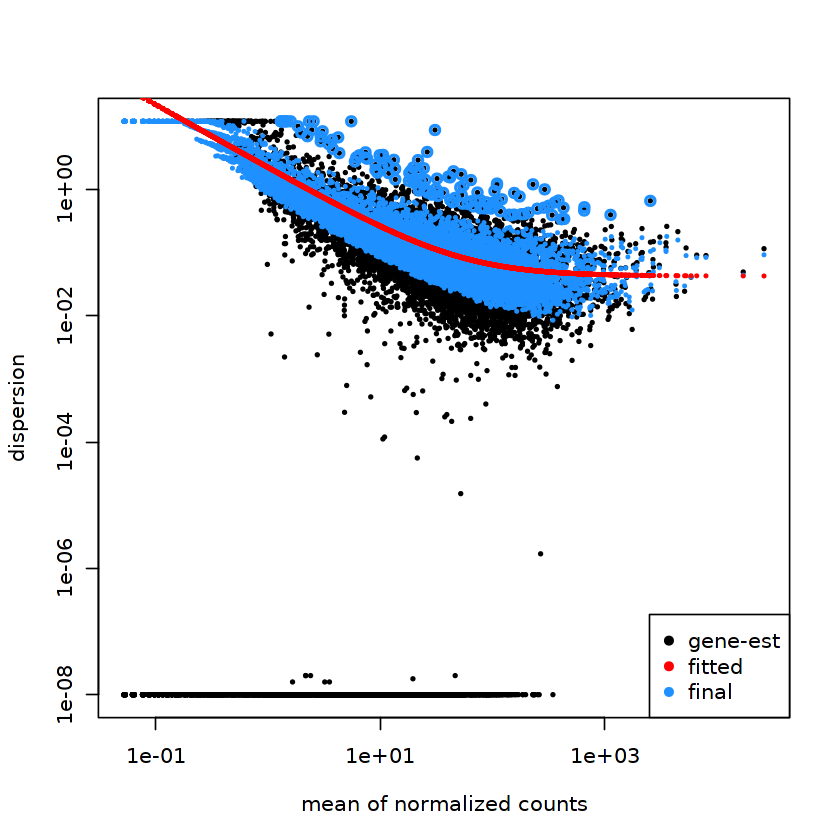

In [13]:
plotDispEsts(dds)

### This is a good plot to examine to ensure your data is a good fit for the DESeq2 model. You expect your data to generally scatter around the curve, with the dispersion decreasing with increasing mean expression levels

In [14]:
## Diplid DE analysis between Tdu and Tpr
## Tpr is the baseline
res_diploid_DE <- results(dds, contrast=c("species", "Tdu", "Tpr"), alpha=0.05)

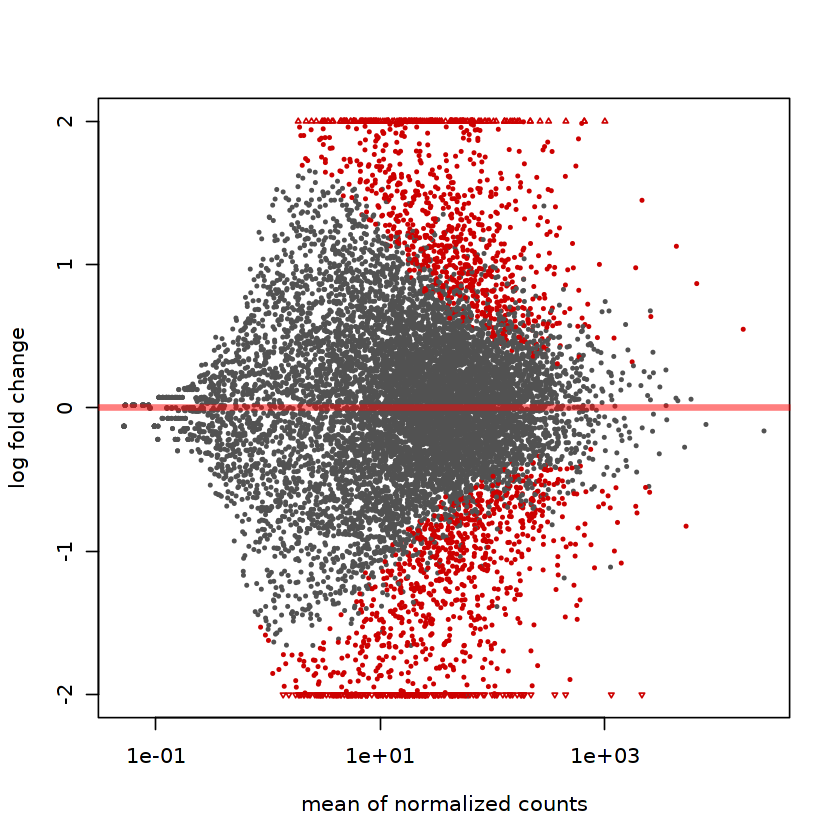

In [15]:
plotMA(res_diploid_DE, ylim=c(-2,2))

In [16]:
summary(res_diploid_DE)


out of 11701 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 951, 8.1%
LFC < 0 (down)     : 989, 8.5%
outliers [1]       : 10, 0.085%
low counts [2]     : 680, 5.8%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [17]:
## Write out non_DE loci
non_DE_loci <- subset(res_diploid_DE, padj >= 0.05)
write.table(non_DE_loci, "DESeq2_noneDE_loci_Tdu_Tpr.txt", sep="\t", quote=F, row.names = TRUE)

In [18]:
## Write out Tdu and Tpr DE loci with LFC
DE_loci_Tdu_higher <- subset(res_diploid_DE, (padj < 0.05 & log2FoldChange > 0))
write.table(DE_loci_Tdu_higher, "DESeq2_DE_loci_Tdu_higher.txt", sep="\t", quote=F, row.names = TRUE)

DE_loci_Tpr_higher <- subset(res_diploid_DE, (padj < 0.05 & log2FoldChange < 0))
write.table(DE_loci_Tpr_higher, "DESeq2_DE_loci_Tpr_higher.txt", sep="\t", quote=F, row.names = TRUE)


out of 11701 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 951, 8.1%
LFC < 0 (down)     : 1177, 10%
outliers [1]       : 10, 0.085%
low counts [2]     : 1134, 9.7%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



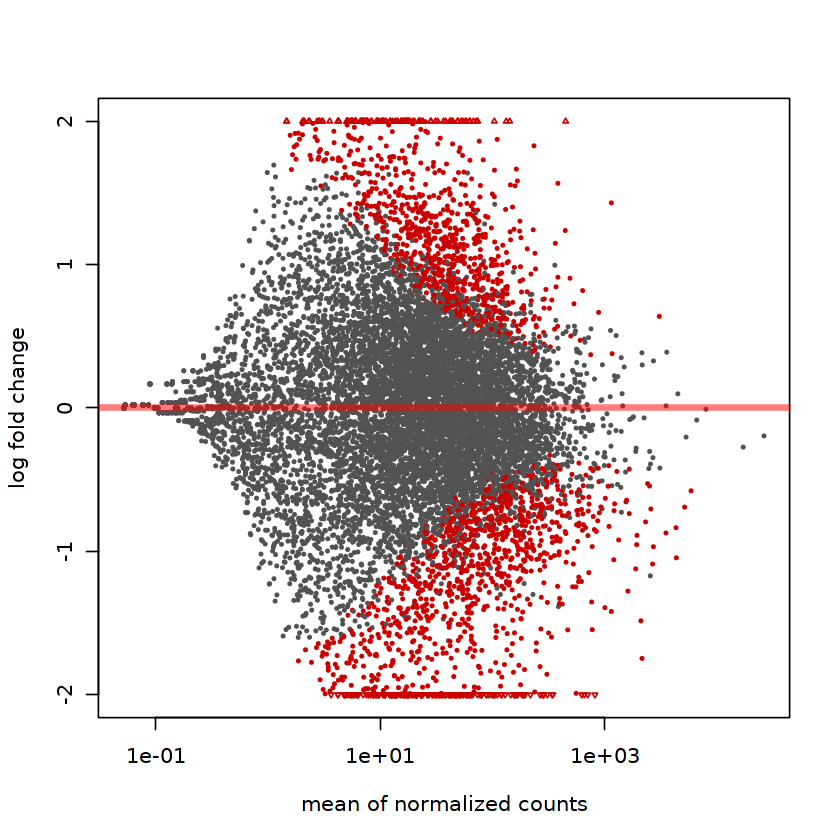

In [19]:
## Diploid DE analysis between Tms and Tdu
## Tdu is the baseline
res_Tms_Tdu_DE <- results(dds, contrast=c("species", "Tms", "Tdu"), alpha=0.05)
plotMA(res_Tms_Tdu_DE, ylim=c(-2,2))
summary(res_Tms_Tdu_DE)

## Write out Tms and Tdu DE loci with LFC
DE_loci_Tms_higher_than_Tdu <- subset(res_Tms_Tdu_DE, (padj < 0.05 & log2FoldChange > 0))
write.table(DE_loci_Tms_higher_than_Tdu, "DESeq2_DE_loci_Tms_higher_than_Tdu.txt", sep="\t", quote=F, row.names = TRUE)

DE_loci_Tdu_higher_than_Tms <- subset(res_Tms_Tdu_DE, (padj < 0.05 & log2FoldChange < 0))
write.table(DE_loci_Tdu_higher_than_Tms, "DESeq2_DE_loci_Tdu_higher_than_Tms.txt", sep="\t", quote=F, row.names = TRUE)

## Write out nonDE loci between Tms and Tdu
non_DE_loci_Tms_Tdu <- subset(res_Tms_Tdu_DE, padj >= 0.05)
write.table(non_DE_loci_Tms_Tdu, "DESeq2_noneDE_loci_Tms_Tdu.txt", sep="\t", quote=F, row.names = TRUE)


out of 11701 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 784, 6.7%
LFC < 0 (down)     : 941, 8%
outliers [1]       : 10, 0.085%
low counts [2]     : 1814, 16%
(mean count < 3)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



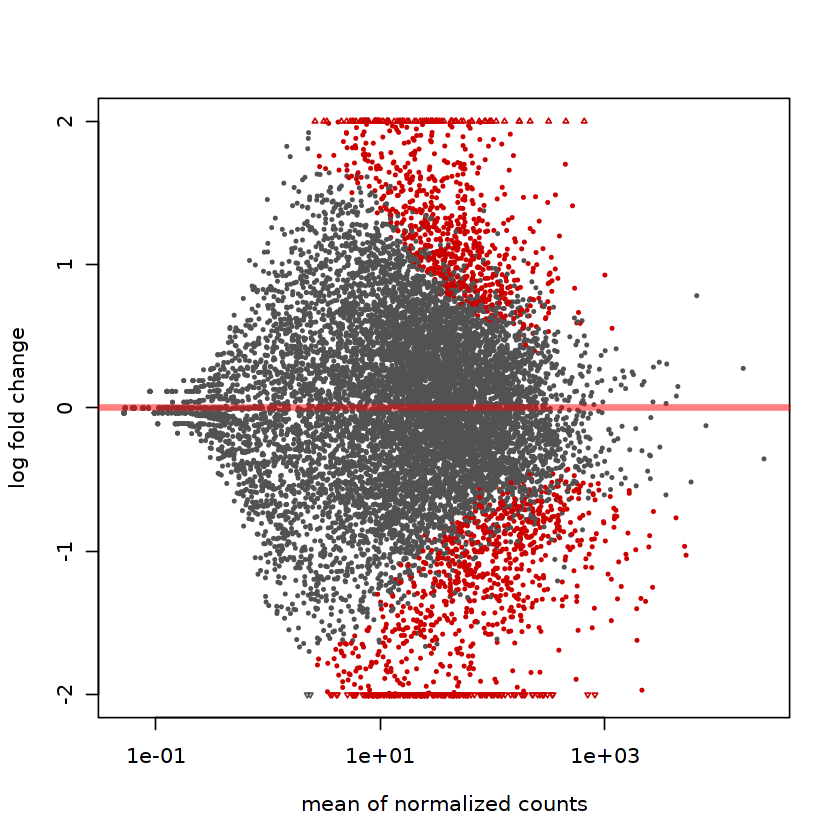

In [20]:
## Diploid DE analysis between Tms and Tpr
## Tpr is the baseline
res_Tms_Tpr_DE <- results(dds, contrast=c("species", "Tms", "Tpr"), alpha=0.05)
plotMA(res_Tms_Tpr_DE, ylim=c(-2,2))
summary(res_Tms_Tpr_DE)

## Write out Tms and Tpr DE loci with LFC
DE_loci_Tms_higher_than_Tpr <- subset(res_Tms_Tpr_DE, (padj < 0.05 & log2FoldChange > 0))
write.table(DE_loci_Tms_higher_than_Tpr, "DESeq2_DE_loci_Tms_higher_than_Tpr.txt", sep="\t", quote=F, row.names = TRUE)

DE_loci_Tpr_higher_than_Tms <- subset(res_Tms_Tpr_DE, (padj < 0.05 & log2FoldChange < 0))
write.table(DE_loci_Tpr_higher_than_Tms, "DESeq2_DE_loci_Tpr_higher_than_Tms.txt", sep="\t", quote=F, row.names = TRUE)

## Write out nonDE loci between Tms and Tpr
non_DE_loci_Tms_Tpr <- subset(res_Tms_Tpr_DE, padj >= 0.05)
write.table(non_DE_loci_Tms_Tpr, "DESeq2_noneDE_loci_Tms_Tpr.txt", sep="\t", quote=F, row.names = TRUE)